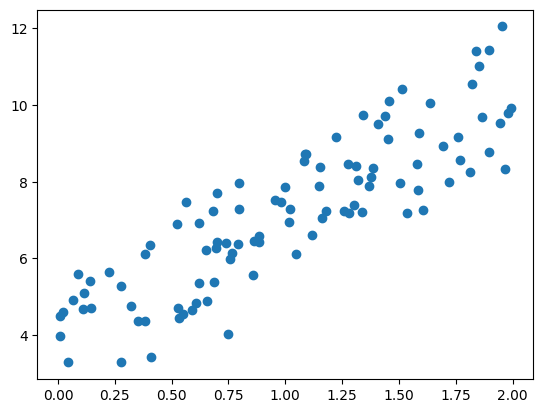

In [ ]:
# Normal equation
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)
plt.show()

In [ ]:
#Computing theta using the normal equation
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.10506616]
 [3.04399271]]


In [ ]:
# Predictions with theta
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
print(y_predict)

[[ 4.10506616]
 [10.19305157]]


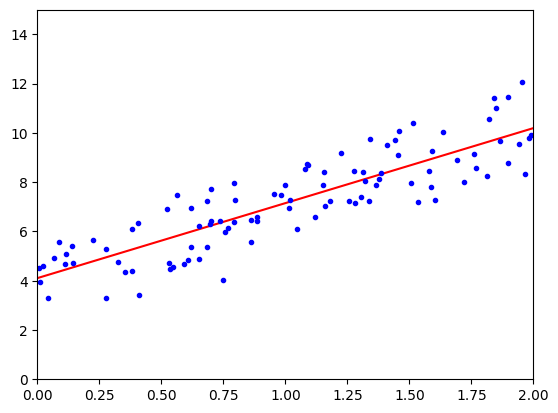

In [ ]:
plt.plot(x_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# performing linear regression using Scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10506616]), array([[3.04399271]]))

In [ ]:
lin_reg.predict(x_new)

array([[ 4.10506616],
       [10.19305157]])

In [ ]:
# So by trainning the model , we obtain the interception and coefficients of the trainning data and with that we can make new predictions
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10506616],
       [3.04399271]])

In [ ]:
np.linalg.pinv(X_b).dot(y) #efficient approach than computing the normal equation

array([[4.10506616],
       [3.04399271]])

In [ ]:
# Batch gradient descendant
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

In [ ]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.10506616],
       [3.04399271]])

In [ ]:
# Stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50 #learning rates hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.16365367],
       [2.98961435]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=100, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10727537]), array([3.05240751]))

Polynomial regression

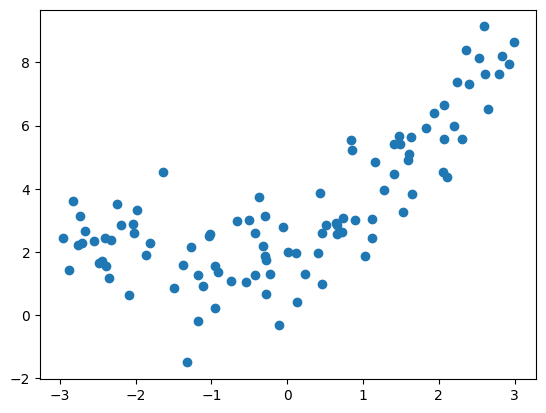

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [ ]:
# An straigh line can not be use to this data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.28113163])

In [ ]:
X_poly[0]

array([-0.28113163,  0.07903499])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09635067]), array([[0.98528059, 0.42728237]]))

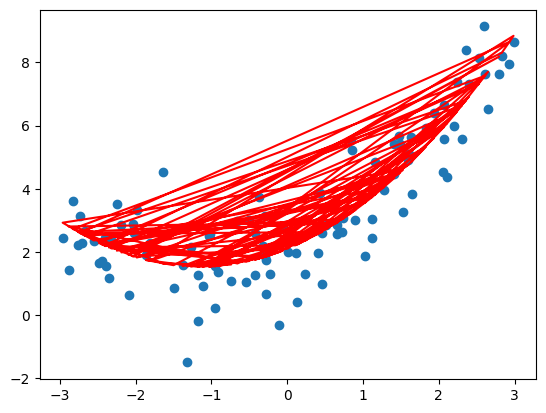

In [ ]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X_poly), color="red")
plt.show()

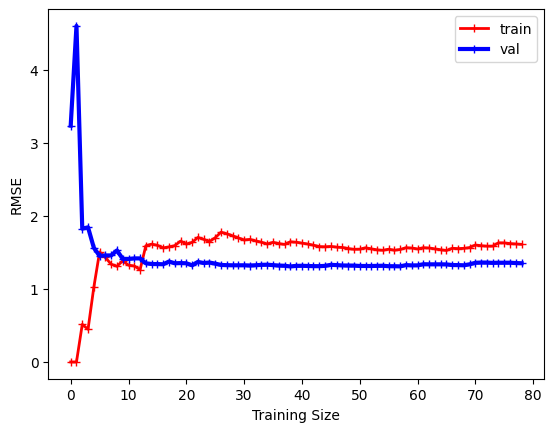

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-+", linewidth=3, label="val")
    plt.xlabel("Training Size")  # Añadir etiqueta al eje X
    plt.ylabel("RMSE")  # Añadir etiqueta al eje Y
    plt.legend()
    plt.show()

# Llamar a la función con tu modelo y datos (reemplazar con tu modelo y datos reales)
plot_learning_curves(LinearRegression(), X, y)



In [ ]:
# Ridge regularization
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver= "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.77321259]])

In [ ]:
# usign SGD
from sklearn.linear_model import SGDRegressor # Import the SGDRegressor class
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.75275889])

In [ ]:
#Lasso regresor
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.72714149])

In [ ]:
# Elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.72928731])

In [ ]:
#early stopping is another way to regulariza GSD methods

LOGISTIC REGRESSION

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:, 3:] # petal length
y = (iris['target']== 2).astype(int)

In [ ]:
#Trainning the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

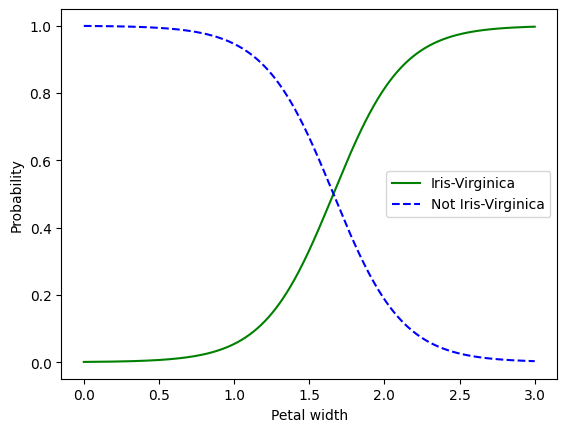

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label = "Not Iris-Virginica")
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [ ]:
#There is a bounding probability in wich the % is 50 and 50 between the two possible classes
log_reg.predict([[1.7], [1.5]])

array([1, 0])

SOFTMAX REGRESSION OR MULTINOMIAL LOGISTIC REGRESSION

In [28]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [29]:
softmax_reg.predict([[5, 2]])

array([2])

In [31]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [32]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])